# Descriptive Statistics


## airbnb

## Measures of Central Tendency

### Mean (Average)

In [60]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "/content/listings.csv"
listings_data = pd.read_csv(url, delimiter=",")

non_quantitative_cols = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'license']
listings_data = listings_data.drop(columns=non_quantitative_cols, errors='ignore')

listings_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,37.77028,-122.43317,158.0,2,485,2.50,1,266,40
1,37.74474,-122.42089,250.0,30,110,0.56,1,312,0
2,37.73077,-122.44827,62.0,4,89,0.57,3,44,2
3,37.76555,-122.45213,55.0,32,10,0.08,20,306,0
4,37.77377,-122.43614,527.0,9,28,0.15,1,364,0


In [61]:
# Clear outliers in the 'price' column using the IQR method

Q1 = listings_data['price'].quantile(0.25)
Q3 = listings_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
listings_data = listings_data[(listings_data['price'] >= lower_bound) & (listings_data['price'] <= upper_bound)].copy()

print(f"Original number of rows: {len(listings_data)}")
print(f"Number of rows after outlier removal: {len(listings_data)}")

# Display the first few rows of the cleaned data
display(listings_data.head())

Original number of rows: 5339
Number of rows after outlier removal: 5339


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,37.77028,-122.43317,158.0,2,485,2.50,1,266,40
1,37.74474,-122.42089,250.0,30,110,0.56,1,312,0
2,37.73077,-122.44827,62.0,4,89,0.57,3,44,2
3,37.76555,-122.45213,55.0,32,10,0.08,20,306,0
4,37.77377,-122.43614,527.0,9,28,0.15,1,364,0


In [62]:
# Compute the means
means = listings_data.mean()
print(means)

latitude                           37.767659
longitude                        -122.431857
price                             190.554973
minimum_nights                     20.494100
number_of_reviews                  65.155647
reviews_per_month                   1.408546
calculated_host_listings_count     18.074733
availability_365                  214.900730
number_of_reviews_ltm              11.086720
dtype: float64


In [63]:
price_mean = listings_data['price'].mean()
print(f"Mean price content: {price_mean:.2f}")

Mean price content: 190.55


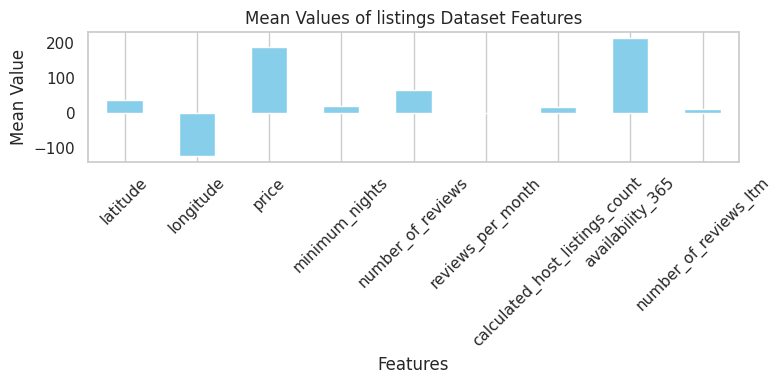

In [64]:
# Plotting
plt.figure(figsize=(8,4))
means.plot(kind='bar', color='skyblue')
plt.title('Mean Values of listings Dataset Features')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Median


In [65]:
# Compute the medians
medians = listings_data.median()
print(medians)

latitude                           37.772642
longitude                        -122.423960
price                             158.000000
minimum_nights                      4.000000
number_of_reviews                  11.000000
reviews_per_month                   0.610000
calculated_host_listings_count      3.000000
availability_365                  232.000000
number_of_reviews_ltm               2.000000
dtype: float64


In [66]:
price_median = listings_data['price'].median()
print(f"Median price content: {price_median:.2f}")


Median price content: 158.00


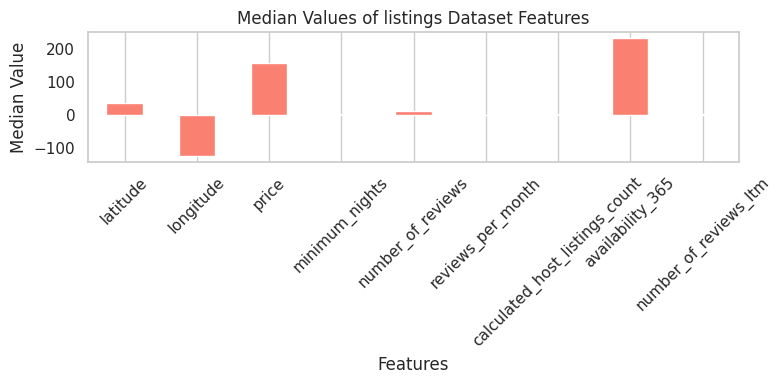

In [67]:
plt.figure(figsize=(8, 4))
medians.plot(kind='bar', color='salmon')
plt.title('Median Values of listings Dataset Features')
plt.ylabel('Median Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Mode


In [68]:
# Compute the modes
modes = listings_data.mode()
print(modes)

    latitude   longitude  price  minimum_nights  number_of_reviews  \
0  37.788415 -122.421594  236.0              30                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.09                               1               365   

   number_of_reviews_ltm  
0                      0  


In [69]:
# Compute the median for alcohol feature
price_mode = listings_data["price"].mode()
print(f"Mode price content: {price_mode[0]:.2f}")

Mode price content: 236.00


<Figure size 800x400 with 0 Axes>

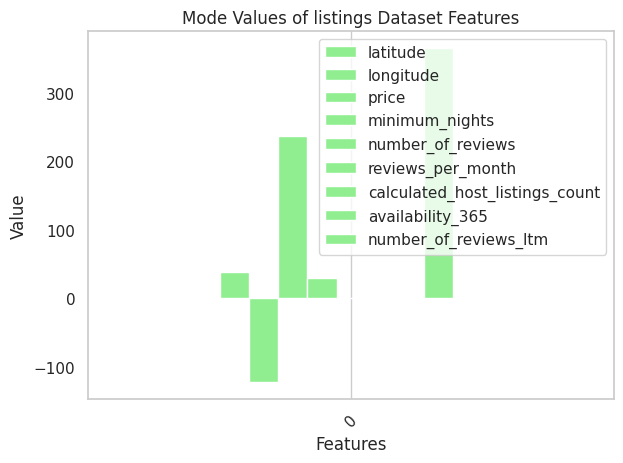

In [70]:
# Plotting
plt.figure(figsize=(8,4))
modes.plot(kind='bar', color='lightgreen')
plt.title('Mode Values of listings Dataset Features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

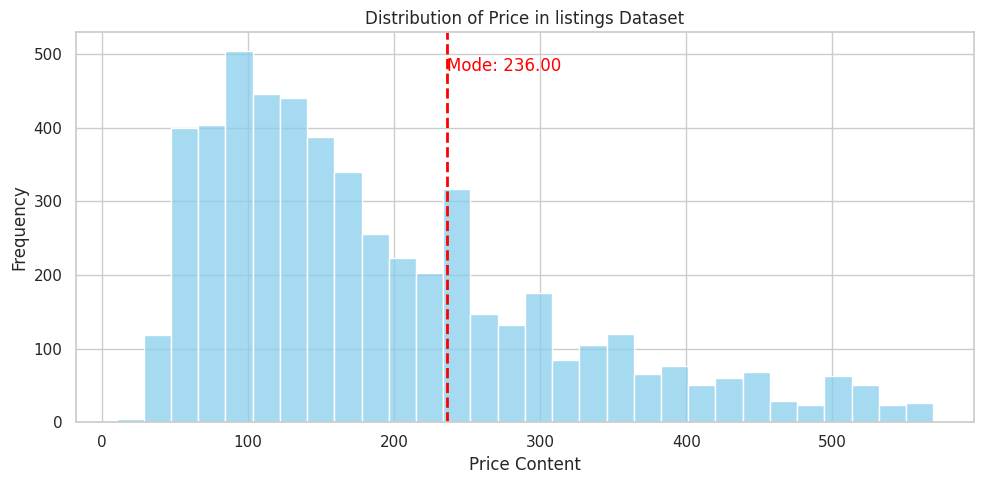

In [71]:
import seaborn as sns
# Set up the style for seaborn plot
sns.set(style="whitegrid")

# Selecting the 'price' feature for demonstration
feature = 'price'

plt.figure(figsize=(10, 5))

# Plotting histogram
sns.histplot(listings_data[feature], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of {feature.capitalize()} in listings Dataset')
plt.xlabel(f'{feature.capitalize()} Content')
plt.ylabel('Frequency')

# Highlight the mode
mode_val = listings_data[feature].mode().iloc[0]
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(mode_val, max_ylim*0.9, f'Mode: {mode_val:.2f}', horizontalalignment='left', color='red')

plt.tight_layout()
plt.show()

## Measures of Dispersion

### Range

Range of 'price' content in listings: 559.00


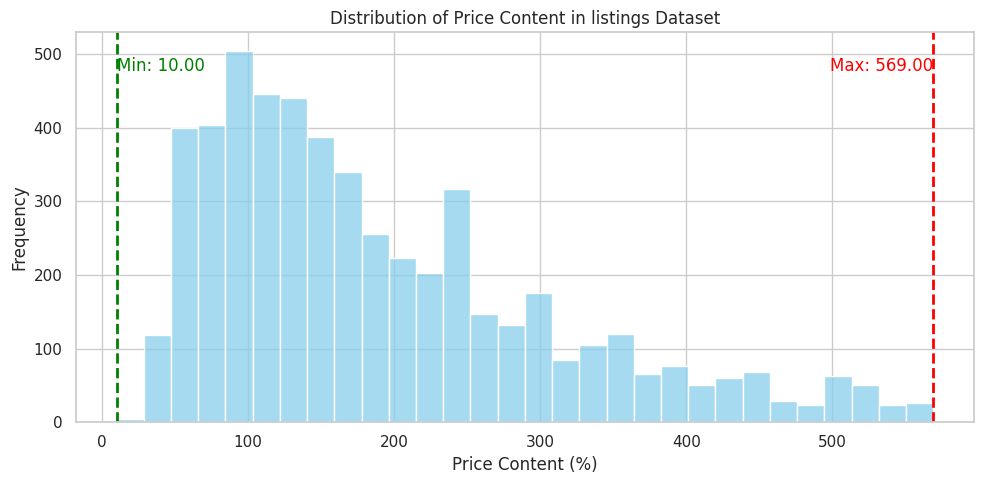

In [72]:
# Calculate range for the 'price' feature
range = listings_data['price'].max() - listings_data['price'].min()
print(f"Range of 'price' content in listings: {range:.2f}")

# Plotting histogram with the range highlighted
plt.figure(figsize=(10, 5))

sns.histplot(listings_data['price'], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of Price Content in listings Dataset')
plt.xlabel('Price Content (%)')
plt.ylabel('Frequency')

# Highlight the min and max values to depict range
min_val = listings_data['price'].min()
max_val = listings_data['price'].max()
plt.axvline(min_val, color='green', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(min_val, max_ylim*0.9, f'Min: {min_val:.2f}', horizontalalignment='left', color='green')
plt.text(max_val, max_ylim*0.9, f'Max: {max_val:.2f}', horizontalalignment='right', color='red')

plt.tight_layout()
plt.show()

### Variance

Variance of 'price' content in listings: 14078.9580


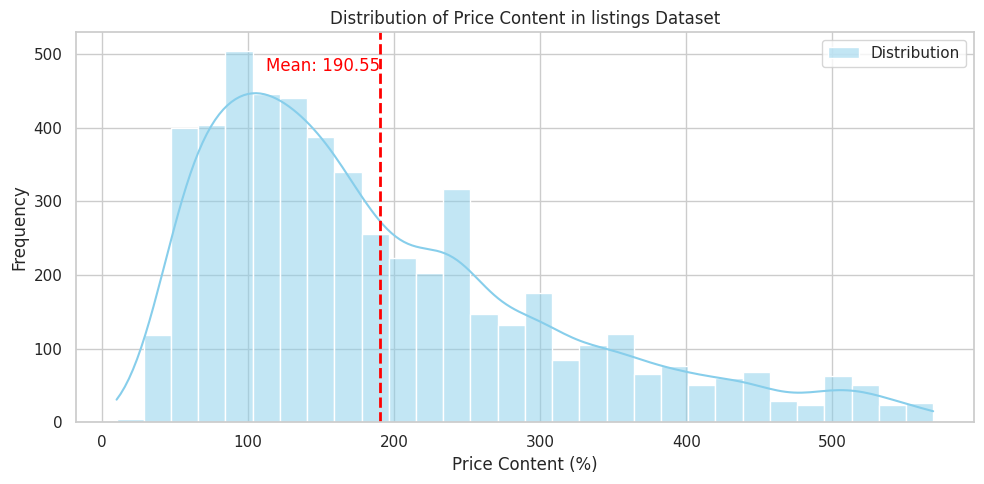

In [73]:
# Import numpy

# Calculate variance for the 'price' feature
price_variance = np.var(listings_data['price'])  # using ddof=1 for unbiased estimator

print(f"Variance of 'price' content in listings: {price_variance:.4f}")

# Plotting histogram with the mean highlighted
plt.figure(figsize=(10, 5))

sns.histplot(listings_data['price'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = listings_data['price'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')

plt.title(f'Distribution of Price Content in listings Dataset')
plt.xlabel('Price Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

###Standard Deviation

Standard Deviation of 'price' content in listings: 118.6659


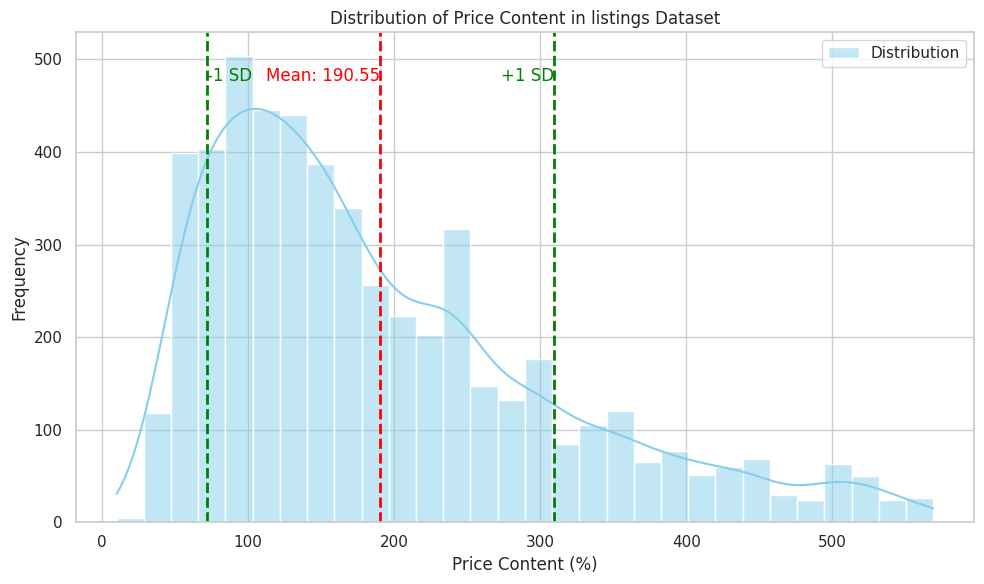

In [74]:
# Calculate standard deviation for the 'price' feature
price_std_dev = np.std(listings_data['price'], ddof=1)  # using ddof=1 for unbiased estimator

print(f"Standard Deviation of 'price' content in listings: {price_std_dev:.4f}")

# Plotting histogram with the mean and standard deviations highlighted
plt.figure(figsize=(10, 6))

sns.histplot(listings_data['price'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = listings_data['price'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_val + price_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - price_std_dev, color='green', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')
plt.text(mean_val + price_std_dev, max_ylim*0.9, f'+1 SD', horizontalalignment='right', color='green')
plt.text(mean_val - price_std_dev, max_ylim*0.9, f'-1 SD', horizontalalignment='left', color='green')

plt.title(f'Distribution of Price Content in listings Dataset')
plt.xlabel('Price Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

###Quartiles and Interquartile Range (IQR)

Q1 (25th Percentile): 100.0000
Q2 (Median / 50th Percentile): 158.0000
Q3 (75th Percentile): 250.0000
IQR (Interquartile Range): 150.0000


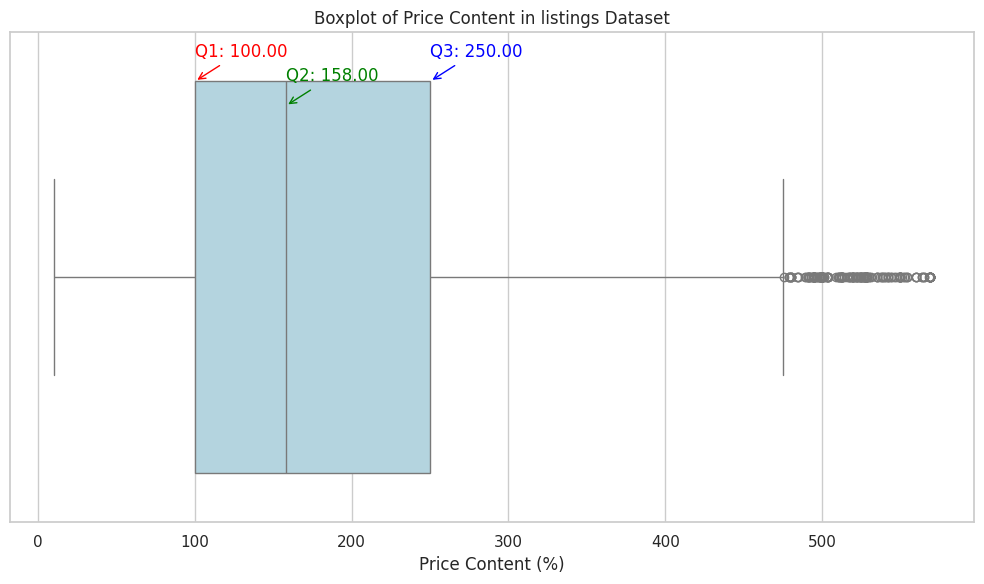

In [75]:
# Compute quartiles and IQR (using percentile function)
Q1 = np.percentile(listings_data['price'], 25)
Q2 = np.percentile(listings_data['price'], 50)
Q3 = np.percentile(listings_data['price'], 75)
IQR = Q3 - Q1

print(f"Q1 (25th Percentile): {Q1:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2:.4f}")
print(f"Q3 (75th Percentile): {Q3:.4f}")
print(f"IQR (Interquartile Range): {IQR:.4f}")

# Visualization using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=listings_data['price'], color="lightblue")
plt.title("Boxplot of Price Content in listings Dataset")
plt.xlabel('Price Content (%)')

# Displaying the quartile values on the plot
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, -0.4), xytext=(Q1, -0.45), arrowprops=dict(arrowstyle='->', color='red'), color='red')
plt.annotate(f'Q2: {Q2:.2f}', xy=(Q2, -0.35), xytext=(Q2, -0.4), arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Q3: {Q3:.2f}', xy=(Q3, -0.4), xytext=(Q3, -0.45), arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

plt.tight_layout()
plt.show()

## ecobici

## Measures of Central Tendency

### Mean (Average)

In [76]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "/content/ecobici_limpios.csv"
listings_data = pd.read_csv(url, delimiter=",")

# Identify non-quantitative columns
non_quantitative_cols = ['Bici', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Retiro', 'Fecha_Arribo', 'Categoria_Duracion', 'Genero_Usuario_?', 'Genero_Usuario_F', 'Genero_Usuario_M', 'Genero_Usuario_O', 'Tipo_Dia']

# Drop the non-quantitative columns
listings_data = listings_data.drop(columns=non_quantitative_cols, errors='ignore')

listings_data.head()

,Edad_Usuario,Duracion_Recorrido,Duracion_Minutos,Dia_Semana,Hora_Inicio
0,30.0,0.000028,26.200000,0,23
1,27.0,0.000020,18.950000,0,23
2,43.0,0.000013,12.133333,0,23
3,26.0,0.000009,8.250000,0,23
4,23.0,0.000006,5.850000,0,23


In [77]:
# Clear outliers in the 'Duracion_Minutos' column using the IQR method

Q1 = listings_data['Duracion_Minutos'].quantile(0.25)
Q3 = listings_data['Duracion_Minutos'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
listings_data = listings_data[(listings_data['Duracion_Minutos'] >= lower_bound) & (listings_data['Duracion_Minutos'] <= upper_bound)].copy()

print(f"Original number of rows: {len(listings_data)}")
print(f"Number of rows after outlier removal: {len(listings_data)}")

# Display the first few rows of the cleaned data
display(listings_data.head())

Original number of rows: 1600771
Number of rows after outlier removal: 1600771


,Edad_Usuario,Duracion_Recorrido,Duracion_Minutos,Dia_Semana,Hora_Inicio
0,30.0,0.000028,26.200000,0,23
1,27.0,0.000020,18.950000,0,23
2,43.0,0.000013,12.133333,0,23
3,26.0,0.000009,8.250000,0,23
4,23.0,0.000006,5.850000,0,23


In [78]:
# Compute the means
means = listings_data.mean(numeric_only=True)
print(means)

Edad_Usuario          34.240782
Duracion_Recorrido     0.000014
Duracion_Minutos      13.504828
Dia_Semana             2.575009
Hora_Inicio           13.683960
dtype: float64


In [79]:
duracion_mean = listings_data['Duracion_Minutos'].mean()
print(f"Mean Duracion_Minutos content: {duracion_mean:.2f}")

Mean Duracion_Minutos content: 13.50


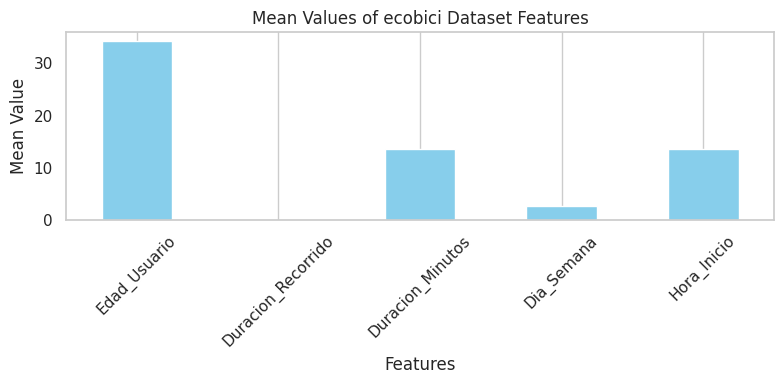

In [80]:
# Plotting
plt.figure(figsize=(8,4))
means.plot(kind='bar', color='skyblue')
plt.title('Mean Values of ecobici Dataset Features')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Median


In [81]:
# Compute the medians
medians = listings_data.median(numeric_only=True)
print(medians)

Edad_Usuario          32.000000
Duracion_Recorrido     0.000012
Duracion_Minutos      11.250000
Dia_Semana             2.000000
Hora_Inicio           14.000000
dtype: float64


In [82]:
duracion_median = listings_data['Duracion_Minutos'].median()
print(f"Median Duracion_Minutos content: {duracion_median:.2f}")

Median Duracion_Minutos content: 11.25


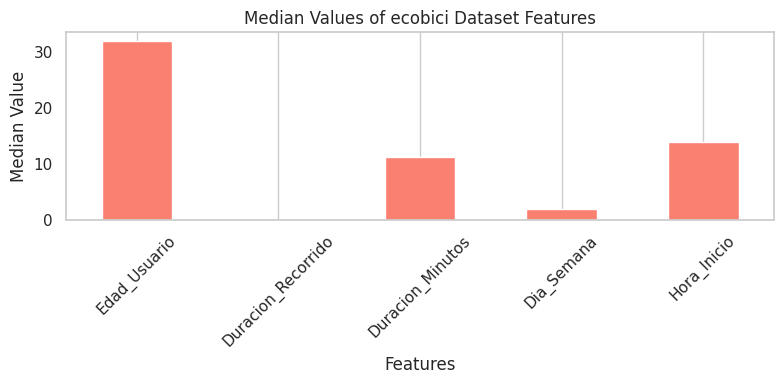

In [83]:
plt.figure(figsize=(8, 4))
medians.plot(kind='bar', color='salmon')
plt.title('Median Values of ecobici Dataset Features')
plt.ylabel('Median Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Mode

In [84]:
# Compute the modes
modes = listings_data.mode(numeric_only=True)
print(modes)

   Edad_Usuario  Duracion_Recorrido  Duracion_Minutos  Dia_Semana  Hora_Inicio
0          30.0            0.000008          7.483333           1            8


In [85]:
duracion_mode = listings_data["Duracion_Minutos"].mode()
print(f"Mode Duracion_Minutos content: {duracion_mode[0]:.2f}")

Mode Duracion_Minutos content: 7.48


<Figure size 800x400 with 0 Axes>

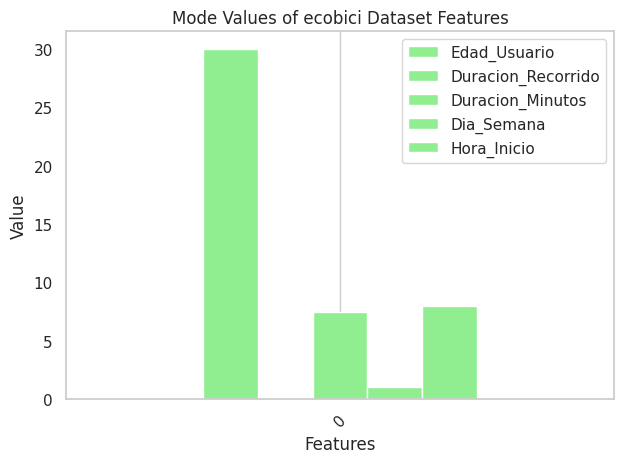

In [86]:
# Plotting
plt.figure(figsize=(8,4))
modes.plot(kind='bar', color='lightgreen')
plt.title('Mode Values of ecobici Dataset Features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

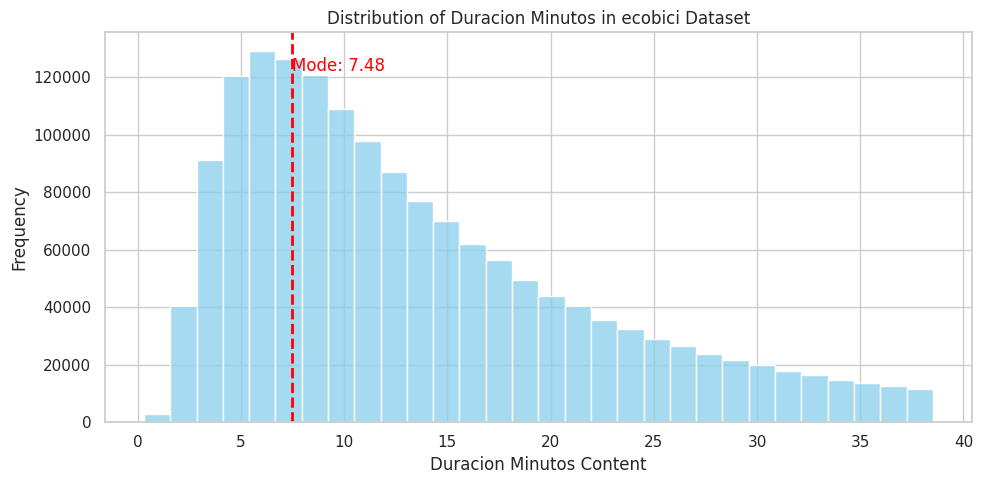

In [87]:
import seaborn as sns
# Set up the style for seaborn plot
sns.set(style="whitegrid")

# Selecting the 'Duracion_Minutos' feature for demonstration
feature = 'Duracion_Minutos'

plt.figure(figsize=(10, 5))

# Plotting histogram
sns.histplot(listings_data[feature], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of {feature.replace("_", " ").title()} in ecobici Dataset')
plt.xlabel(f'{feature.replace("_", " ").title()} Content')
plt.ylabel('Frequency')

# Highlight the mode
mode_val = listings_data[feature].mode().iloc[0]
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(mode_val, max_ylim*0.9, f'Mode: {mode_val:.2f}', horizontalalignment='left', color='red')

plt.tight_layout()
plt.show()

## Measures of Dispersion

Range of 'Duracion_Minutos' content in ecobici: 38.22


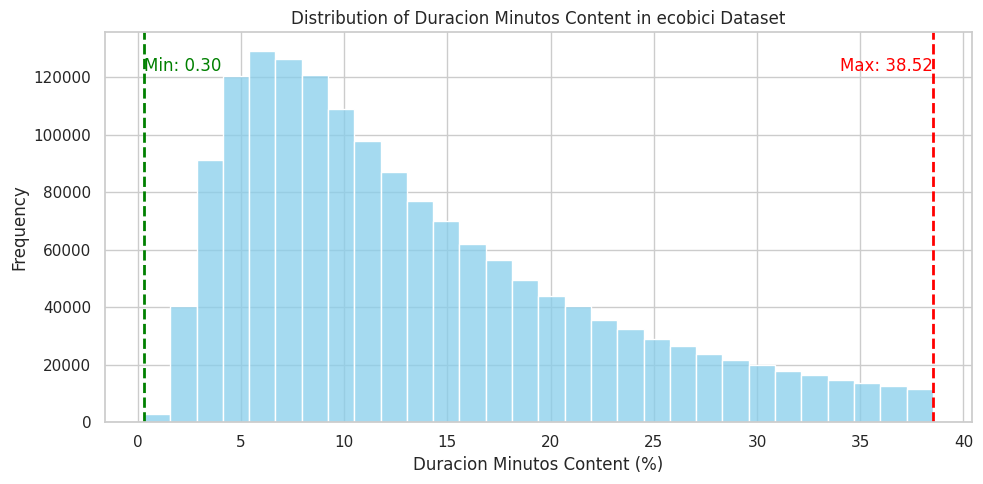

In [88]:
# Calculate range for the 'Duracion_Minutos' feature
range = listings_data['Duracion_Minutos'].max() - listings_data['Duracion_Minutos'].min()
print(f"Range of 'Duracion_Minutos' content in ecobici: {range:.2f}")

# Plotting histogram with the range highlighted
plt.figure(figsize=(10, 5))

sns.histplot(listings_data['Duracion_Minutos'], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of Duracion Minutos Content in ecobici Dataset')
plt.xlabel('Duracion Minutos Content (%)')
plt.ylabel('Frequency')

# Highlight the min and max values to depict range
min_val = listings_data['Duracion_Minutos'].min()
max_val = listings_data['Duracion_Minutos'].max()
plt.axvline(min_val, color='green', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(min_val, max_ylim*0.9, f'Min: {min_val:.2f}', horizontalalignment='left', color='green')
plt.text(max_val, max_ylim*0.9, f'Max: {max_val:.2f}', horizontalalignment='right', color='red')

plt.tight_layout()
plt.show()

### Variance

Variance of 'Duracion_Minutos' content in ecobici: 72.9374


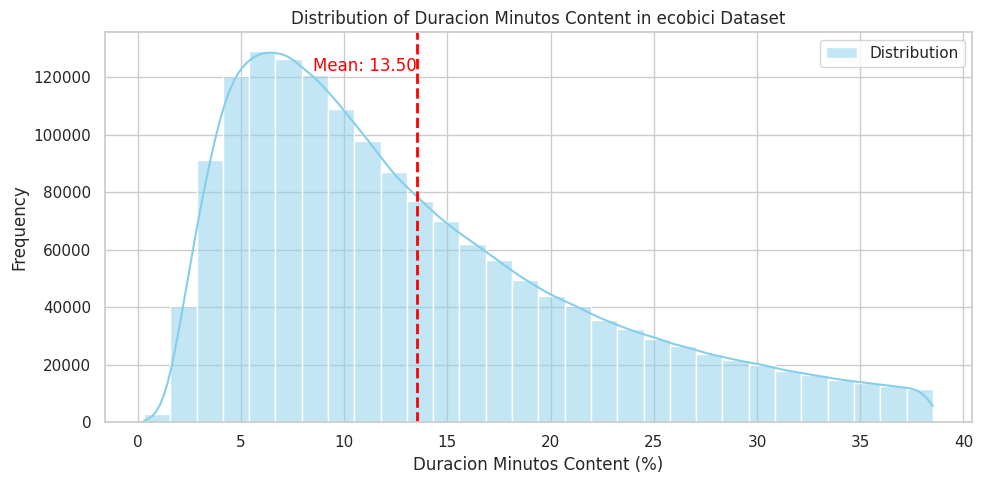

In [89]:
# Import numpy

# Calculate variance for the 'Duracion_Minutos' feature
duracion_variance = np.var(listings_data['Duracion_Minutos'], ddof=1)  # using ddof=1 for unbiased estimator

print(f"Variance of 'Duracion_Minutos' content in ecobici: {duracion_variance:.4f}")

# Plotting histogram with the mean highlighted
plt.figure(figsize=(10, 5))

sns.histplot(listings_data['Duracion_Minutos'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = listings_data['Duracion_Minutos'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')

plt.title(f'Distribution of Duracion Minutos Content in ecobici Dataset')
plt.xlabel('Duracion Minutos Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

###Standard Deviation

Standard Deviation of 'Duracion_Minutos' content in ecobici: 8.5403


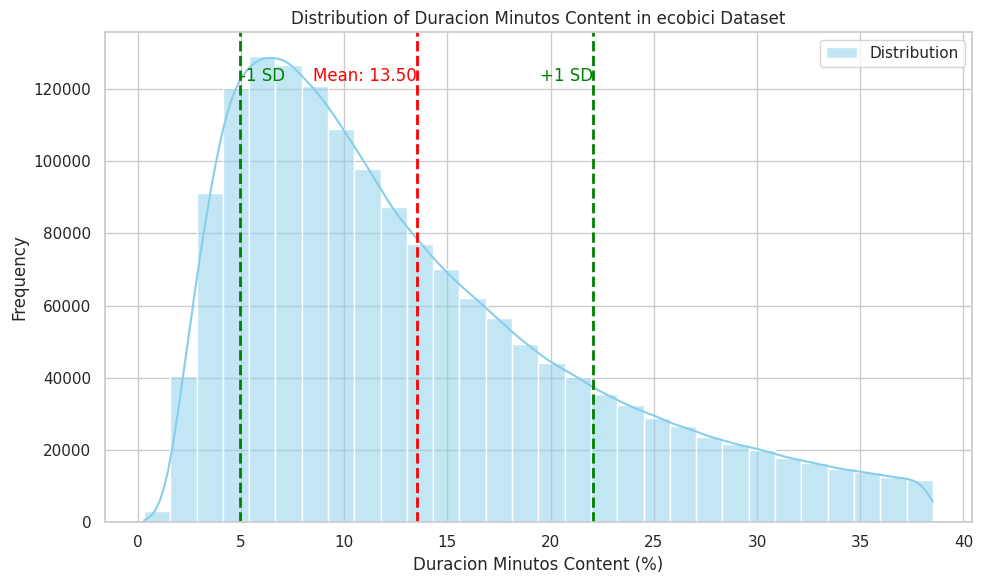

In [90]:
# Calculate standard deviation for the 'Duracion_Minutos' feature
duracion_std_dev = np.std(listings_data['Duracion_Minutos'], ddof=1)  # using ddof=1 for unbiased estimator

print(f"Standard Deviation of 'Duracion_Minutos' content in ecobici: {duracion_std_dev:.4f}")

# Plotting histogram with the mean and standard deviations highlighted
plt.figure(figsize=(10, 6))

sns.histplot(listings_data['Duracion_Minutos'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = listings_data['Duracion_Minutos'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_val + duracion_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - duracion_std_dev, color='green', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')
plt.text(mean_val + duracion_std_dev, max_ylim*0.9, f'+1 SD', horizontalalignment='right', color='green')
plt.text(mean_val - duracion_std_dev, max_ylim*0.9, f'-1 SD', horizontalalignment='left', color='green')

plt.title(f'Distribution of Duracion Minutos Content in ecobici Dataset')
plt.xlabel('Duracion Minutos Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

###Quartiles and Interquartile Range (IQR)

Q1 (25th Percentile): 6.8333
Q2 (Median / 50th Percentile): 11.2500
Q3 (75th Percentile): 18.3667
IQR (Interquartile Range): 11.5333


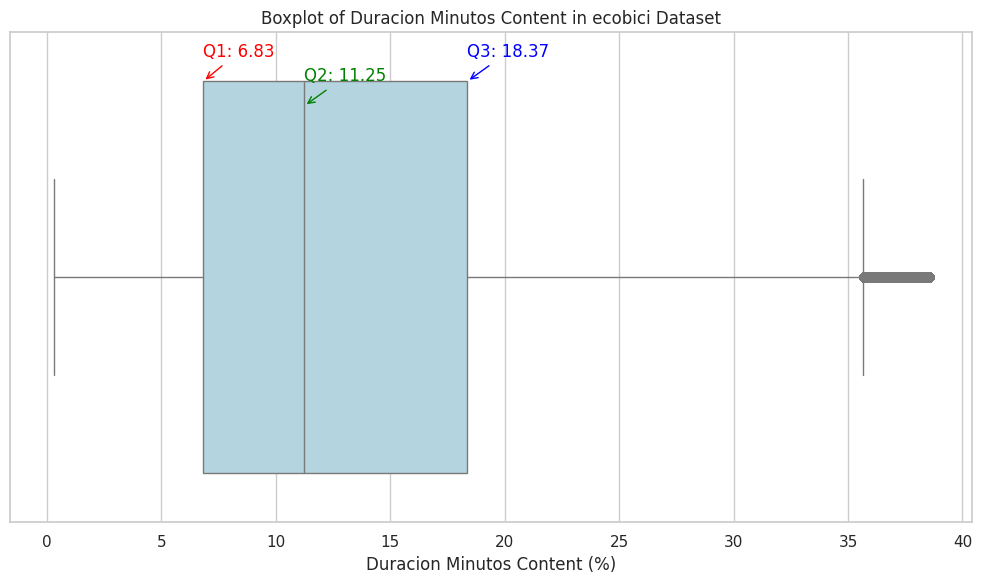

In [91]:
# Compute quartiles and IQR (using percentile function)
Q1 = np.percentile(listings_data['Duracion_Minutos'], 25)
Q2 = np.percentile(listings_data['Duracion_Minutos'], 50)
Q3 = np.percentile(listings_data['Duracion_Minutos'], 75)
IQR = Q3 - Q1

print(f"Q1 (25th Percentile): {Q1:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2:.4f}")
print(f"Q3 (75th Percentile): {Q3:.4f}")
print(f"IQR (Interquartile Range): {IQR:.4f}")

# Visualization using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=listings_data['Duracion_Minutos'], color="lightblue")
plt.title("Boxplot of Duracion Minutos Content in ecobici Dataset")
plt.xlabel('Duracion Minutos Content (%)')

# Displaying the quartile values on the plot
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, -0.4), xytext=(Q1, -0.45), arrowprops=dict(arrowstyle='->', color='red'), color='red')
plt.annotate(f'Q2: {Q2:.2f}', xy=(Q2, -0.35), xytext=(Q2, -0.4), arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Q3: {Q3:.2f}', xy=(Q3, -0.4), xytext=(Q3, -0.45), arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

plt.tight_layout()
plt.show()